In [13]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import pickle
from sklearn.model_selection import train_test_split

In [11]:
import cv2
data = []
labels = []
Devnagari = {"0":0,"1":10,"2":2,"3":3,"4":11,"5":12,"6":13,"7":14,"8":15,"9":9}
Western_Arabic = {"0":16,"1":1,"2":17,"3":18,"4":19,"5":20,"6":21,"7":22,"8":23,"9":9}
f = open("/Users/Rutvik/Desktop/ML Project/Code/Data/Subsets/DAT_Representation/dataset_final.dat", "rb+")
dataset = pickle.load(f)
for i in range(len(dataset[0])):
    image = dataset[0][i]
    number = np.argmax(dataset[1][i])
    data.append(image)
    labels.append(number)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(data,labels, test_size = 0.2, random_state = 1)

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)
n_samples,nx,ny = X_train.shape
n_samples_test,nx_test,ny_test = X_test.shape
X_train = X_train.reshape((n_samples,nx*ny))
X_test_ = X_test.reshape((n_samples_test,nx_test*ny_test))

In [16]:
from sklearn.preprocessing import StandardScaler
stand_data = StandardScaler().fit_transform(X_train)
print(stand_data.shape)

(96768, 784)


In [17]:
sample_data = stand_data
covar_matrix = np.matmul(sample_data.T , sample_data)
covar_matrix.shape

(784, 784)

In [18]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print(vectors.shape)
print("updated vector")
vectors = vectors.T
print(vectors.shape)

(784, 2)
updated vector
(2, 784)


In [19]:
new_coordinates = np.matmul(vectors,sample_data.T)
new_coordinates = np.vstack((new_coordinates,y_train)).T
dataframe = pd.DataFrame(data = new_coordinates, columns=("1st_principal", "2nd_principal","label"))
dataframe

,1st_principal,2nd_principal,label
0,44.093032,-24.045731,0.0
1,-1.809476,7.780801,18.0
2,1.069019,3.552681,5.0
3,-1.776663,7.341678,18.0
4,3.448149,-5.538327,20.0
...,...,...,...
96763,-0.417632,6.615397,0.0
96764,-2.691448,3.991330,14.0
96765,-0.940847,6.042949,0.0
96766,3.554677,-5.343086,23.0


/Users/Rutvik/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


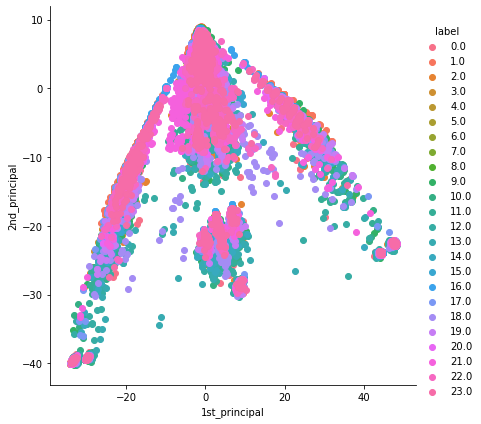

In [20]:
import seaborn as sn
sn.FacetGrid(dataframe, hue = "label",size=6).map(plt.scatter, "1st_principal","2nd_principal").add_legend()
plt.show()

In [32]:
features = dataframe.drop('label',1)

/Users/Rutvik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [33]:
features

,1st_principal,2nd_principal
0,44.093032,-24.045731
1,-1.809476,7.780801
2,1.069019,3.552681
3,-1.776663,7.341678
4,3.448149,-5.538327
...,...,...
96763,-0.417632,6.615397
96764,-2.691448,3.991330
96765,-0.940847,6.042949
96766,3.554677,-5.343086
